# Diabetes Prediction

### Importing Libraries 

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

### Loading Dataset 

In [102]:
diabetes_data = pd.read_csv("C:/Users/User/Downloads/diabetes_data_upload.csv")

In [103]:
diabetes_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [104]:
diabetes_data.shape

(520, 17)

In [105]:
diabetes_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Identifying the nominal features

In [106]:
columns = diabetes_data.columns
col = columns[1:16]
col

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

Converting Nominal values to Numeric values

In [107]:
le = LabelEncoder()
for i in col:
    diabetes_data[i] = le.fit_transform(diabetes_data[i])

In [108]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [109]:
diabetes_data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

### Visualizing Data 

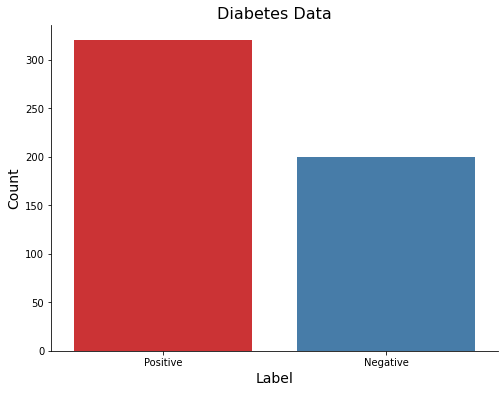

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x=diabetes_data['class'], palette="Set1")
plt.title("Diabetes Data", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Separating Features and Label 

In [111]:
X = diabetes_data.drop(columns='class', axis=1)
Y = diabetes_data['class']

In [112]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [113]:
Y

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

### Splitting Training and Testing Data 

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

In [115]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (416, 16)
X_test shape: (104, 16)
Y_train shape: (416,)
Y_test shape: (104,)


## Model Evaluation 

### Logistic Regression 

In [116]:
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=1)

Training Accuracy

In [117]:
# Evaluate the Logistic Regression Classifier on training data
y_pred_train = lr.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9230769230769231


Testing Accuracy

In [118]:
# Evaluate the Logistic Regression Classifier on testing data
y_pred_test = lr.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9615384615384616


In [119]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95        40
    Positive       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



Confusion Matrix

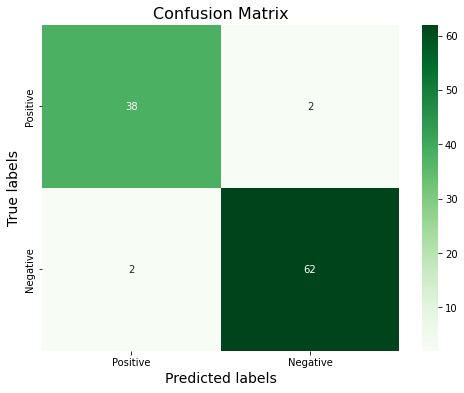

In [120]:
cm = confusion_matrix(Y_test, y_pred_test)
class_names = ['Positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### SVM 

In [121]:
s = SVC(C=10.0, kernel='linear', random_state=1)
s.fit(X_train, Y_train)

SVC(C=10.0, kernel='linear', random_state=1)

Training Accuracy

In [122]:
# Evaluate the SVM Classifier on training data
y_pred_train = s.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9399038461538461


Testing Accuracy

In [123]:
# Evaluate the SVM Classifier on testing data
y_pred_test = s.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9519230769230769


In [124]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94        40
    Positive       0.97      0.95      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



Confusion Matrix

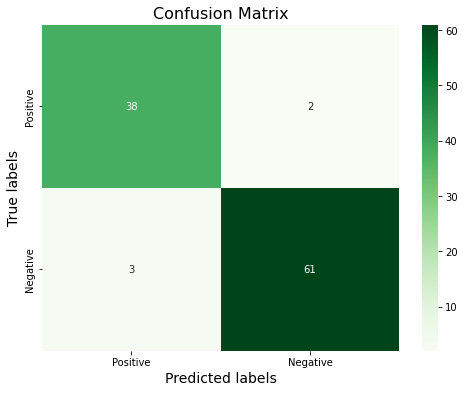

In [125]:
cm = confusion_matrix(Y_test, y_pred_test)
class_names = ['Positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Random Forest

In [126]:
rf = RandomForestClassifier(n_estimators=15, random_state=1)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=15, random_state=1)

Training Accuarcy

In [127]:
# Evaluate the RandomForest Classifier on training data
y_pred_train = rf.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0


Testing Accuracy

In [128]:
# Evaluate the RandomForest Classifier on testing data
y_pred_test = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9903846153846154


In [129]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        40
    Positive       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



Confusion Matrix

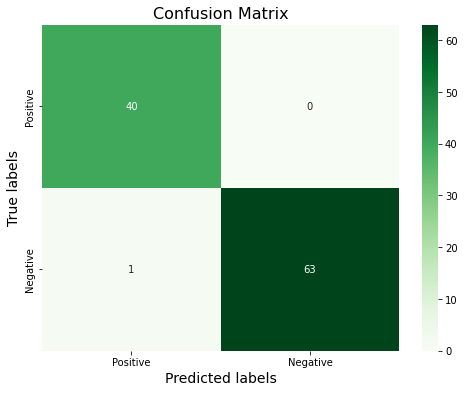

In [130]:
cm = confusion_matrix(Y_test, y_pred_test)
class_names = ['Positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Out of the 3 models evaluated, RandomForest works good with a training accuracy of 100% and testing accuracy of 99%.

So, RandomForest model will be used for making the predictions.

### Saving the Model 

In [131]:
pickle.dump(rf, open('model.sav', 'wb'))

## Prediction System 

In [61]:
# Taking user inputs
age = int(input("Enter your Age: "))
gender = input("Enter your Gender (Male / Female): ")
polyuria = input("Do you have Polyuria? (Yes / No): ")
polydipsia = input("Do you have polydipsia?  (Yes / No): ")
wt_loss = input("Do you have sudden weight loss?  (Yes / No): ")
weak = input("Do you have Weakness?  (Yes / No): ")
polyphagia = input("Do you have Polyphagia?  (Yes / No): ")
gen_thrush = input("Are you having Genital thrush?  (Yes / No): ")
vis_blur = input("Do you have Visual blurring?  (Yes / No): ")
itch = input("Do you have Itching?  (Yes / No): ")
irritability = input("Do you have Irritability?  (Yes / No): ")
del_heal = input("Do you have delayed healing?  (Yes / No): ")
part_pare = input("Do you have partial paresis?  (Yes / No): ")
mus_stiff = input("Do you have muscle stiffness? (Yes / No): ")
alop = input("Do you have Alopecia?  (Yes / No): ")
obes = input("Do you have Obesity?  (Yes / No): ")


# Converting nominal values to 0 or 1
binary_map_gen = {"Male": 1, "Female": 0}
gender = binary_map_gen.get(gender, -1)
binary_map = {"Yes": 1, "No": 0}
polyuria = binary_map.get(polyuria, -1)
polydipsia = binary_map.get(polydipsia, -1)
wt_loss = binary_map.get(wt_loss, -1)
weak = binary_map.get(weak, -1)
polyphagia = binary_map.get(polyphagia, -1)
gen_thrush = binary_map.get(gen_thrush, -1)
vis_blur = binary_map.get(vis_blur, -1)
itch = binary_map.get(itch, -1)
irritability = binary_map.get(irritability, -1)
del_heal = binary_map.get(del_heal, -1)
part_pare = binary_map.get(part_pare, -1)
mus_stiff = binary_map.get(mus_stiff, -1)
alop = binary_map.get(alop, -1)
obes = binary_map.get(obes, -1)

# Converting the list in a DataFrame
features_df = pd.DataFrame({
    "Age": [age],
    "Gender": [gender],
    "Polyuria": [polyuria],
    "Polydipsia": [polydipsia],
    "sudden weight loss": [wt_loss],
    "weakness": [weak],
    "Polyphagia": [polyphagia],
    "Genital thrush": [gen_thrush],
    "visual blurring": [vis_blur],
    "Itching": [itch],
    "Irritability": [irritability],
    "delayed healing": [del_heal],
    "partial paresis": [part_pare],
    "muscle stiffness": [mus_stiff],
    "Alopecia": [alop],
    "Obesity": [obes]
})

# Predicting diabetes based on the features
prediction = rf.predict(features_df)

# Display the prediction"
if prediction[0] == 'Positive':
    print("\n\033[1mYou have Diabetes")
else:
    print("\n\033[1mYou do not have Diabetes")

Enter your Age: 40
Enter your Gender (Male / Female): Male
Do you have Polyuria? (Yes / No): Yes
Do you have polydipsia?  (Yes / No): No
Do you have sudden weight loss?  (Yes / No): Yes
Do you have Weakness?  (Yes / No): No
Do you have Polyphagia?  (Yes / No): Yes
Are you having Genital thrush?  (Yes / No): No
Do you have Visual blurring?  (Yes / No): No
Do you have Itching?  (Yes / No): No
Do you have Irritability?  (Yes / No): Yes
Do you have delayed healing?  (Yes / No): No
Do you have partial paresis?  (Yes / No): Yes
Do you have muscle stiffness? (Yes / No): No
Do you have Alopecia?  (Yes / No): Yes
Do you have Obesity?  (Yes / No): Yes

You have Diabetes
